# Problem Statement 
Build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
#Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [2]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Sumarry Statistics

In [4]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Visualizing Target Variables

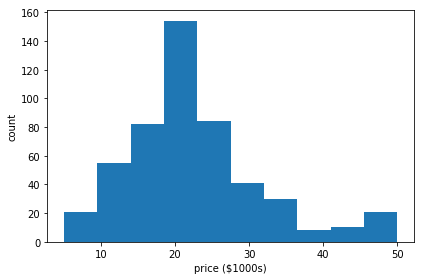

In [5]:
%matplotlib inline
plt.figure(figsize=(6, 4))
plt.hist(targets)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

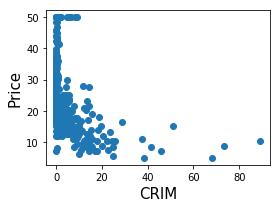

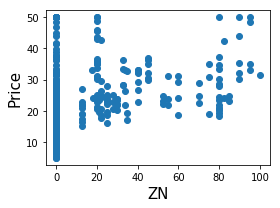

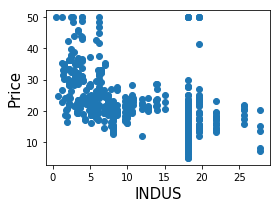

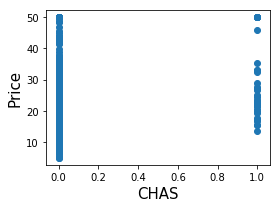

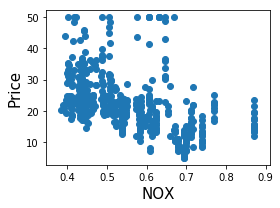

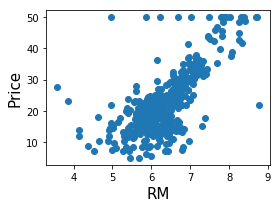

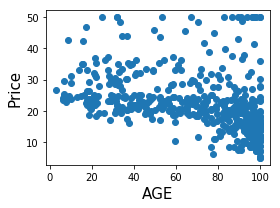

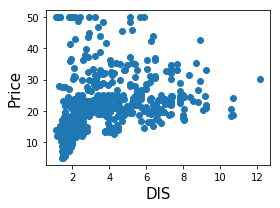

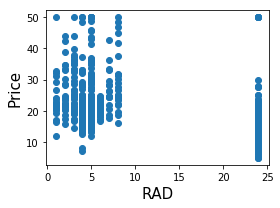

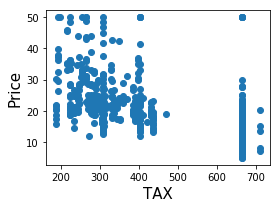

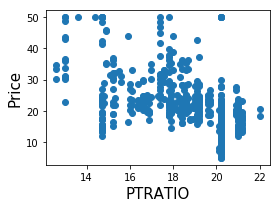

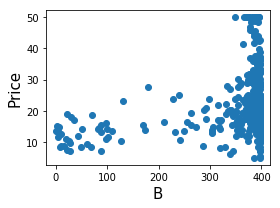

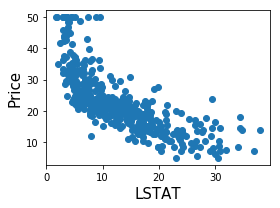

In [7]:
# Pirnt the scatter plot for each feature with respect to price
X = features.values
feature_names = features.columns
for index, feature_name in enumerate(features.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, index], targets)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# Split the data into trainning set and test set

In [8]:
X = features.values
Y = targets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state=101)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (354, 13)
X_test Shape :  (152, 13)
Y_train Shape :  (354,)
Y_test.shape :  (152,)


# Importance score of features used in RandomForest Regressor

In [17]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features.columns),reverse=True))

Y_pred = rf.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(Y_pred,Y_test))
print("R2 Score of the Regression Model rf : ",r2_score(Y_pred,Y_test))

Features sorted by their score:
[(0.4506, 'RM'), (0.37, 'LSTAT'), (0.065, 'DIS'), (0.0279, 'CRIM'), (0.0254, 'NOX'), (0.0195, 'PTRATIO'), (0.0155, 'TAX'), (0.0097, 'AGE'), (0.0084, 'B'), (0.004, 'INDUS'), (0.0027, 'RAD'), (0.001, 'ZN'), (0.0003, 'CHAS')]
Error Rate of the Regression Model rf :  2.461969736842105
R2 Score of the Regression Model rf :  0.971584550398111


In [19]:
lr = LinearRegression()
lr.fit(X, Y)
print("Features sorted by their score:")


Y_pred_lr = lr.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(Y_pred_lr,Y_test))
print("R2 Score of the Regression Model rf : ",r2_score(Y_pred_lr,Y_test))

Features sorted by their score:
Error Rate of the Regression Model rf :  26.86233461389515
R2 Score of the Regression Model rf :  0.619190208102741


#### NOTE:-
The accuracy score of <font color='blue'>Random Forest Regressor</font> is 97% as while that of <font color='blue'>Linera Regression Model</font> is 61.9%
Hence the <font color='blue'>Random Forest Regressor Model</font> performs better on the Boston Housing Dataset in predicting future prices.

# Data Visualization for <font color='blue'>Random Forest Regressor Model</font>.

Text(0.5,1,'Prices vs Predicted prices')

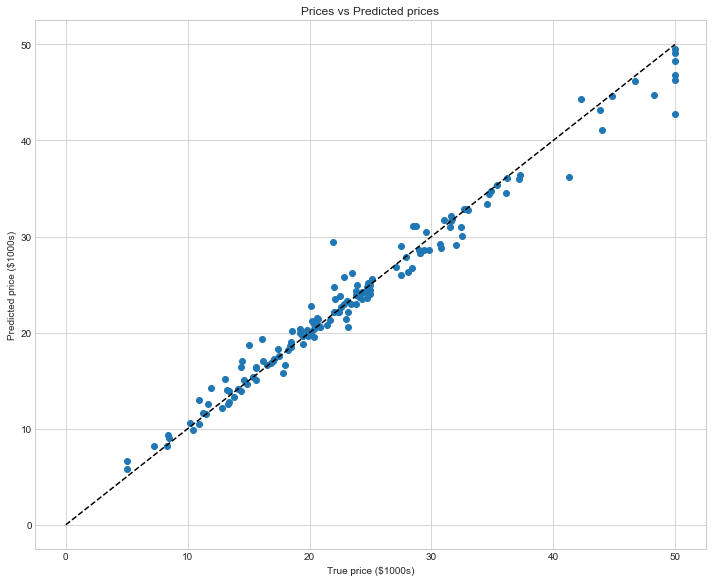

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Data Visualization for <font color='blue'>Linear Regression Model</font>.

Text(0.5,1,'Prices vs Predicted prices')

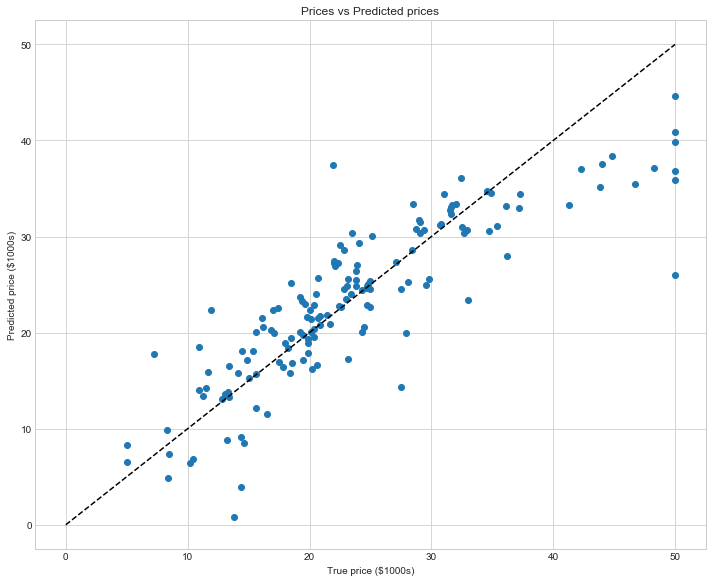

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred_lr)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Using Bagging Mechanism to check the score of <font color='blue'>Random Forest Regressor Model</font> with different parameters.

In [22]:
# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestRegressor(max_features=13, random_state=1)
rfc1.fit(X_train, Y_train)
Y_pred1 = rfc1.predict(X_test)
print("Error Rate of the Regression Model rfc1 : ",mean_squared_error(Y_pred1,Y_test))
print("R2 Score of the Regression Model rfc1 : ",r2_score(Y_pred1,Y_test))
print('########################################################################')

# play around with the setting for max_features
rfc2 = RandomForestRegressor(max_features=8, random_state=1)
rfc2.fit(X_train, Y_train)
Y_pred2 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc2 : ",mean_squared_error(Y_pred2,Y_test))
print("R2 Score of the Regression Model rfc2 : ",r2_score(Y_pred2,Y_test))
print('########################################################################')
# play around with the setting for max_features
rfc3 = RandomForestRegressor(n_estimators=20,max_features=8, random_state=1)
rfc3.fit(X_train, Y_train)
Y_pred3 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(Y_pred3,Y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(Y_pred3,Y_test))

Error Rate of the Regression Model rfc1 :  12.970775
R2 Score of the Regression Model rfc1 :  0.8270714144863721
########################################################################
Error Rate of the Regression Model rfc2 :  15.970603289473681
R2 Score of the Regression Model rfc2 :  0.7816165647549633
########################################################################
Error Rate of the Regression Model rfc3 :  15.970603289473681
R2 Score of the Regression Model rfc3 :  0.7816165647549633


#### Note the error rate of the model increases when the number of features is decreased to 8 from 13.

In [39]:
print(sorted(zip(map(lambda x: round(x, 4), rfc1.feature_importances_), features.columns),reverse=True))

[(0.5, 'LSTAT'), (0.3102, 'RM'), (0.0555, 'CRIM'), (0.0404, 'DIS'), (0.0265, 'NOX'), (0.0188, 'PTRATIO'), (0.0161, 'TAX'), (0.0148, 'AGE'), (0.0065, 'INDUS'), (0.0061, 'B'), (0.0029, 'RAD'), (0.002, 'ZN'), (0.0003, 'CHAS')]


In [40]:
print(sorted(zip(map(lambda x: round(x, 4), rfc2.feature_importances_), features.columns),reverse=True))

[(0.4344, 'LSTAT'), (0.3187, 'RM'), (0.0626, 'NOX'), (0.0576, 'CRIM'), (0.0325, 'PTRATIO'), (0.0254, 'DIS'), (0.0163, 'TAX'), (0.0141, 'AGE'), (0.013, 'RAD'), (0.0095, 'INDUS'), (0.0092, 'B'), (0.004, 'CHAS'), (0.0028, 'ZN')]


In [46]:
print(sorted(zip(map(lambda x: round(x, 4), rfc3.feature_importances_), features.columns),reverse=True))

[(0.3621, 'LSTAT'), (0.3502, 'RM'), (0.0807, 'CRIM'), (0.0719, 'NOX'), (0.0361, 'DIS'), (0.027, 'PTRATIO'), (0.0188, 'AGE'), (0.0146, 'INDUS'), (0.0134, 'TAX'), (0.013, 'B'), (0.0081, 'RAD'), (0.0023, 'CHAS'), (0.0019, 'ZN')]


#### NOTE :-

We can observe that* different models is able to identify the most important features as <font color='green'>LSTAT</font> and <font color='green'>RM</font> and indicates that other fetures might contribute equally, hence their order changes.

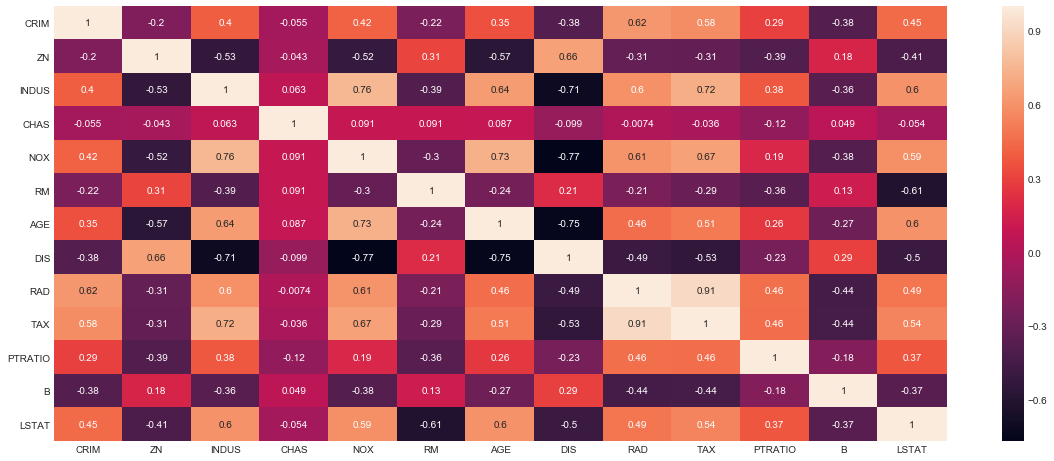

In [102]:
df_corr = features.corr()
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True)

In [103]:
#create correlation matrix with absolute values
df_corr = features.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

['NOX', 'DIS', 'TAX']


In [104]:
up_tri

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,NaN,0.199458,0.404471,0.055295,0.417521,0.219940,0.350784,0.377904,0.622029,0.579564,0.288250,0.377365,0.452220
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993


# Eliminating the corealted varaiables and trying the RandomForestRegressor again

In [23]:
X1 = features.drop(['DIS', 'TAX'],axis=1)#eliminating two and keeping one features
Y1 = targets
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size =0.3,random_state=101)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)
rf4 = RandomForestRegressor()
rf4.fit(X_test, Y_test)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf4.feature_importances_), X1.columns),reverse=True))

X_train Shape :  (354, 11)
X_test Shape :  (152, 11)
Y_train Shape :  (354,)
Y_test.shape :  (152,)
Features sorted by their score:
[(0.6695, 'RM'), (0.1966, 'LSTAT'), (0.0352, 'CRIM'), (0.022, 'NOX'), (0.0201, 'B'), (0.0173, 'AGE'), (0.0137, 'PTRATIO'), (0.0133, 'CHAS'), (0.0056, 'RAD'), (0.0049, 'INDUS'), (0.0017, 'ZN')]


In [24]:
Y_pred4 = rf4.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(Y_pred4,Y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(Y_pred4,Y_test))

Error Rate of the Regression Model rfc3 :  3.7917513157894747
R2 Score of the Regression Model rfc3 :  0.9579354525851705


#### R-2 Score
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

#### Note
The efficiency of the RandomForest Regression model increased after removing the highly corelated features
The corresponding R-2 score for the model is 95 % which is higher as comapred to rf,rfc1,rfc2,rfc3.
Also the error rate is less in rf4.

# Regression Plot for RandomForestRegression Model rf4

Text(0.5,1,'Prices vs Predicted prices')

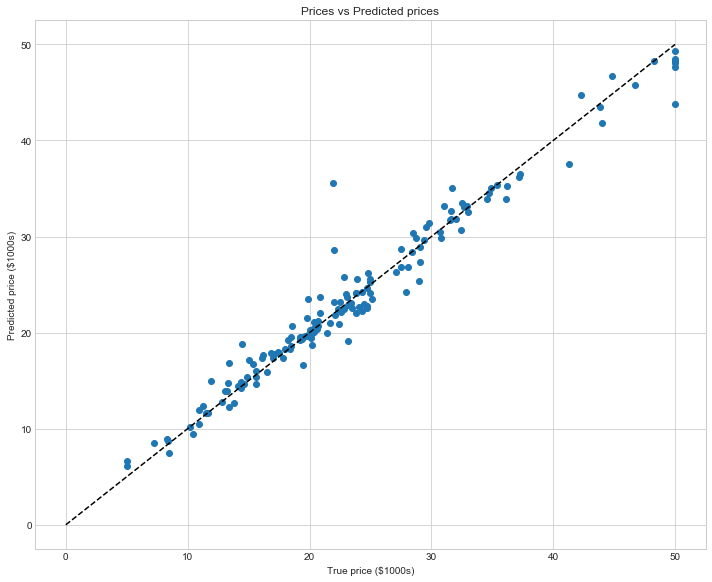

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred4)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Regression Plot for RandomForestRegression Model rfc3

Text(0.5,1,'Prices vs Predicted prices')

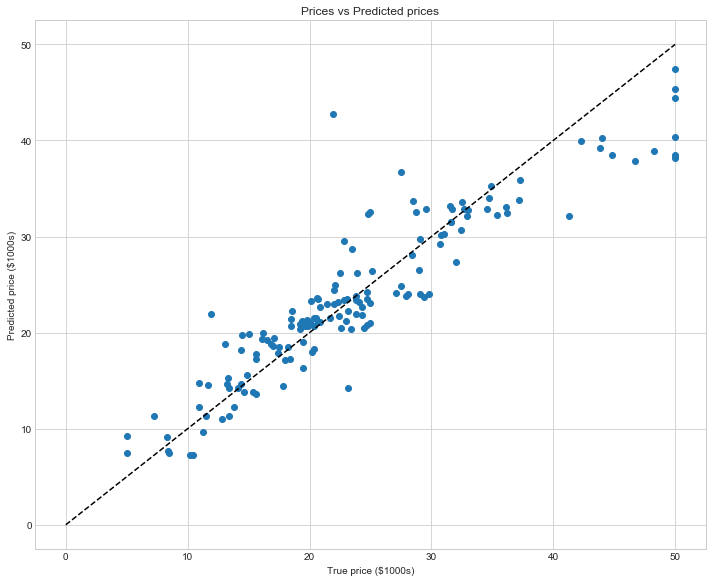

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Regression Plot for RandomForestRegression Model rfc2

Text(0.5,1,'Prices vs Predicted prices')

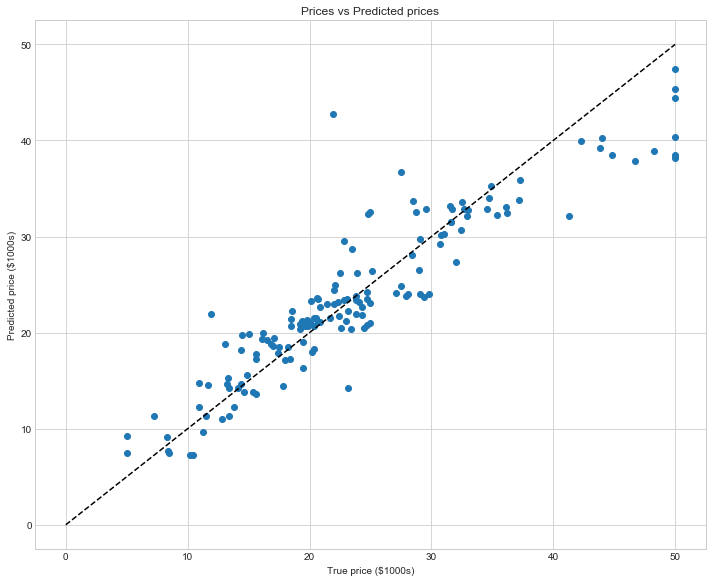

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred2)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Regression Plot for RandomForestRegression Model rfc1

Text(0.5,1,'Prices vs Predicted prices')

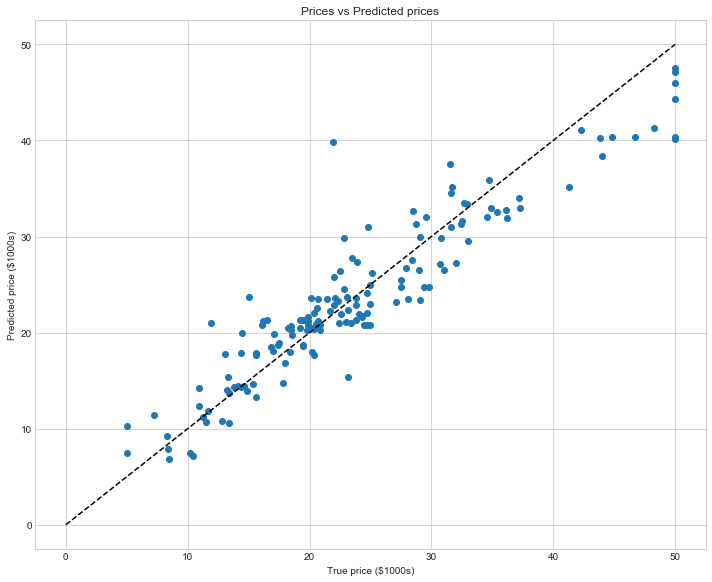

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

# Regression Plot for RandomForestRegression Model rf

Text(0.5,1,'Prices vs Predicted prices')

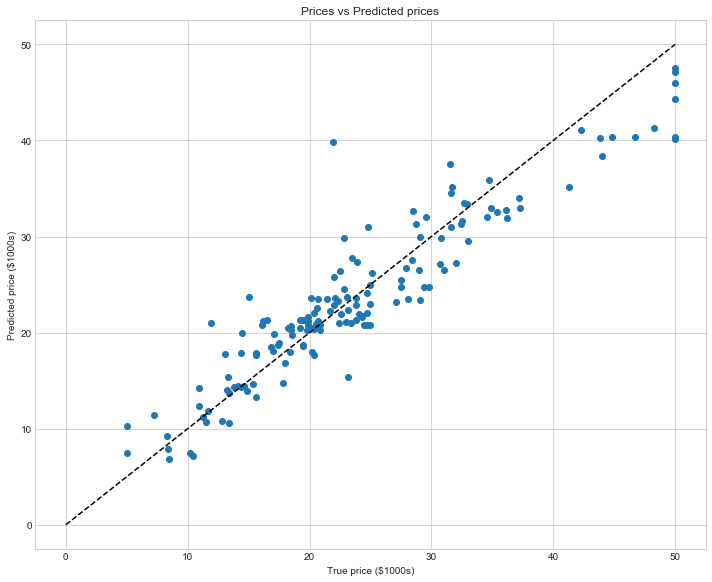

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

#### NOTE

The above regression plots show that the data is fitted more accurately to regression line for the model rf4 where the correlated data has been removed.

# 10 Fold Cross Validation 

Another popular feature selection method is to directly measure the impact of each feature on accuracy of the model. The general idea is to permute the values of each feature and measure how much the permutation decreases the accuracy of the model. Clearly, for unimportant variables, the permutation should have little to no effect on model accuracy, while permuting important variables should significantly decrease it.

In [100]:
from sklearn.cross_validation import KFold
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
lr = RandomForestRegressor(random_state=1)
X = features.values
Y = targets
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = Y[train_fold]
    valid_y = Y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    acc = r2_score(valid_y, pred)
    for i in range(X.shape[1]):
        X_t = valid.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(valid_y, rf.predict(X_t))
        scores_kfold[names[i]].append((acc-shuff_acc)/acc)
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))


Accuracy per fold:  [0.65221437606442, 0.794327716496428, 0.8954825527574444, 0.9222116466264503, 0.7063213669153462, 0.8984284987034967, 0.5663754524364073, 0.7875844204796927, 0.9068373016981295, 0.8667009125553131] 

Average accuracy:  0.7996484244733126


In [101]:
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores_kfold.items()], reverse=True))


Features sorted by their score:
[(0.7018, 'RM'), (0.5481, 'LSTAT'), (0.0677, 'DIS'), (0.045, 'CRIM'), (0.0276, 'PTRATIO'), (0.0192, 'B'), (0.0169, 'NOX'), (0.0168, 'TAX'), (0.015, 'AGE'), (0.0071, 'INDUS'), (0.0023, 'RAD'), (0.0009, 'CHAS'), (0.0005, 'ZN')]


In this example LSTAT and RM are two features that strongly impact model performance: permuting them decreases model performance by ~70% and ~54% respectively. Keep in mind though that these measurements are made only after the model has been trained (and is depending) on all of these features. This doesn’t mean that if we train the model without one these feature, the model performance will drop by that amount, since other, correlated features can be used instead

# 10 FOLD CROSS VALDATON with max_features as 10

In [27]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=10,shuffle=True,random_state=0)
lr = RandomForestRegressor(max_features=10,random_state=1)
X = features.values
Y = targets
names = features.columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = Y[train_fold]
    valid_y = Y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    acc = r2_score(valid_y, pred)
    for i in range(X.shape[1]):
        X_t = valid.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(valid_y, rf.predict(X_t))
        scores_kfold[names[i]].append((acc-shuff_acc)/acc)
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores_kfold.items()], reverse=True))


Accuracy per fold:  [0.6839464469450487, 0.8220338548953083, 0.8911904456418323, 0.9300743979847733, 0.7033552469326099, 0.9077794279452027, 0.6672827046888656, 0.8329642778144942, 0.9352902632053334, 0.8409967083843857] 

Average accuracy:  0.8214913774437853
Features sorted by their score:
[(0.5788, 'LSTAT'), (0.5514, 'RM'), (0.137, 'DIS'), (0.0584, 'NOX'), (0.0445, 'CRIM'), (0.023, 'PTRATIO'), (0.0189, 'AGE'), (0.0183, 'TAX'), (0.0101, 'B'), (0.0052, 'INDUS'), (0.0037, 'RAD'), (0.0006, 'ZN'), (0.0004, 'CHAS')]


# 10 FOLD CROSS VALDATON with max_features as 8

In [28]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=8,shuffle=True,random_state=0)
lr = RandomForestRegressor(max_features=10,random_state=1)
X = features.values
Y = targets
names = features.columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = Y[train_fold]
    valid_y = Y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    acc = r2_score(valid_y, pred)
    for i in range(X.shape[1]):
        X_t = valid.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(valid_y, rf.predict(X_t))
        scores_kfold[names[i]].append((acc-shuff_acc)/acc)
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores_kfold.items()], reverse=True))


Accuracy per fold:  [0.6848621532689587, 0.8244330239598076, 0.8911900965195921, 0.8425233967592982, 0.914025151285431, 0.6170295653762968, 0.9197875874689413, 0.8840942998242023] 

Average accuracy:  0.822243159307816
Features sorted by their score:
[(0.6265, 'LSTAT'), (0.5375, 'RM'), (0.1079, 'DIS'), (0.061, 'NOX'), (0.0393, 'CRIM'), (0.0222, 'TAX'), (0.0221, 'PTRATIO'), (0.0193, 'AGE'), (0.0109, 'B'), (0.0053, 'INDUS'), (0.0031, 'RAD'), (0.0006, 'CHAS'), (0.0005, 'ZN')]


#### NOTE :-

We can observe that cross validation result for different models is able to identify the most important features as <font color='green'>LSTAT</font> and <font color='green'>RM</font> and indicates that other fetures might contribute equally, hence their order changes.